Import all the neccessary library to run the experiments

# New Section

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import roc_curve,auc

Set the data collection and put the file destination to run the data

In [2]:
! ls

heart.csv  sample_data


In [ ]:
df=pd.read_csv("/content/heart.csv")

Check the data head whether it is running in the system

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df['target'].unique()

array([0, 1])

In [ ]:
df.columns=['age','sex','chest_pain_type','resting_blood_pressure','cholesterol','fasting_blood_sugar','rest_ecg','max_heart_rate_achieved','exercise_induced_angina','st_depression','st_slope','num_major_vessels','thalassemia','target']

In [ ]:
df.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
target                       int64
dtype: object

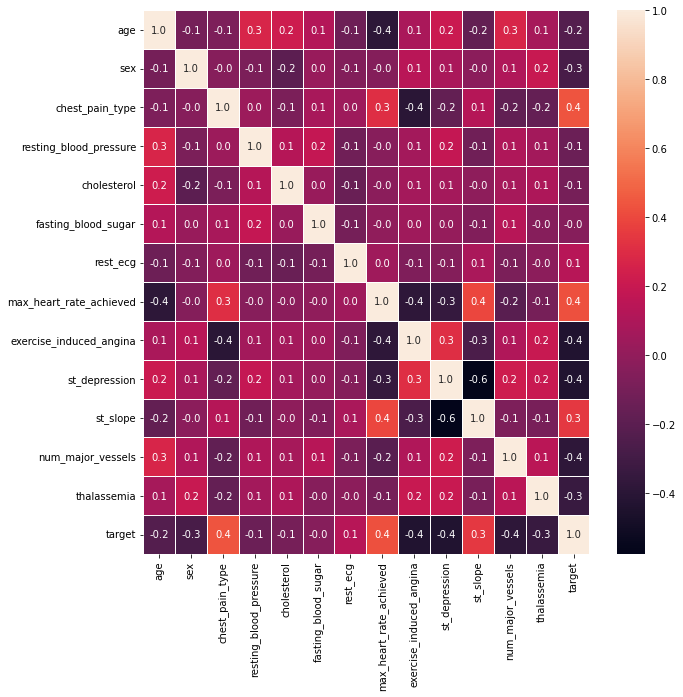

In [ ]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, linewidth=0.5, fmt='.1f', ax=ax)
plt.show()

Draw the boxplot to find the outliers

<AxesSubplot:ylabel='resting_blood_pressure'>

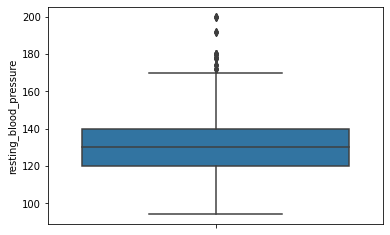

In [ ]:
sns.boxplot(y='resting_blood_pressure', data=df)

<AxesSubplot:ylabel='cholesterol'>

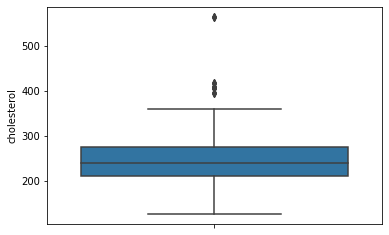

In [ ]:
sns.boxplot(y='cholesterol',data=df)

<AxesSubplot:ylabel='max_heart_rate_achieved'>

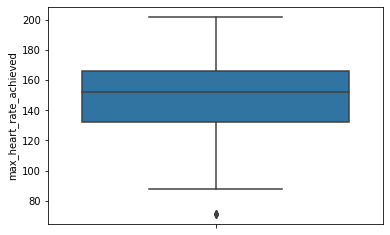

In [ ]:
sns.boxplot(y='max_heart_rate_achieved',data=df)

Statistical measures of the data

In [ ]:
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df ['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

1--> Defetive heart
0--> Healthy heart

Splitting the features and target

In [ ]:
X=df.drop(columns='target',axis=1)
Y=df['target']

In [ ]:
print(X)

      age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0      52    1                0                     125          212   
1      53    1                0                     140          203   
2      70    1                0                     145          174   
3      61    1                0                     148          203   
4      62    0                0                     138          294   
...   ...  ...              ...                     ...          ...   
1020   59    1                1                     140          221   
1021   60    1                0                     125          258   
1022   47    1                0                     110          275   
1023   50    0                0                     110          254   
1024   54    1                0                     120          188   

      fasting_blood_sugar  rest_ecg  max_heart_rate_achieved  \
0                       0         1                      168   
1      

In [ ]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


Spilling the data into training data and test data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(1025, 13) (820, 13) (205, 13)


Model Training

Logistic Regression Model

In [ ]:
model=LogisticRegression()

Training the logisticRegression Model with training data

In [ ]:
model.fit(X_train, Y_train)

LogisticRegression()

Model EValuation
Accuracy on training data

In [ ]:
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training Data:  ',training_data_accuracy)

Accuracy on Training Data:   0.8524390243902439


Accuracy on Test Data

In [ ]:
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy on Test Data:  ',test_data_accuracy)

Accuracy on Test Data:   0.8048780487804879


Building a Predictive system

In [ ]:
input_data=(46,1,0,120,249,0,0,144,0,0.8,2,0,3)

#change the input data to a numpy array 

input_data_as_numpy_array=np.asarray(input_data)

#reshape the numpy array as we are predicting for only one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)
print(prediction)
if (prediction[0]==0):
    print('The person does not have a heart diesease')
else:
     print('The person has heart diesease')  

[0]
The person does not have a heart diesease


Random Forest Classifier

In [ ]:
model=RandomForestClassifier(max_depth=5)
model.fit(X_train,Y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
Y_predict=model.predict(X_test)

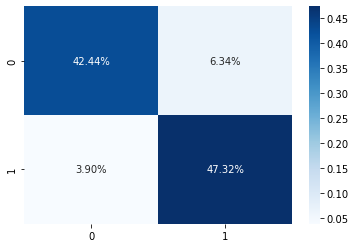

Accuracy is:  89.75609756097562


In [ ]:
cm=confusion_matrix(Y_test,Y_predict)
sns.heatmap(cm/np.sum(cm),annot=True, fmt=".2%",cmap='Blues')
plt.show()
ac=accuracy_score(Y_test,Y_predict)
print('Accuracy is: ',ac*100)

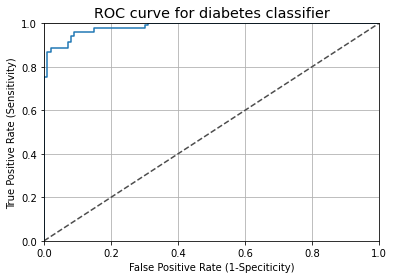

In [ ]:
Y_pred_quant=model.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred_quant)
fig,ax=plt.subplots()
ax.plot(fpr,tpr)
ax.plot([0,1],[0,1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1-Speciticity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [ ]:
auc(fpr,tpr)

0.9838095238095239

SVM

In [ ]:
X=df.iloc[ :, : -1].values
Y=df.iloc[ :, -1].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Y)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
from sklearn.svm import SVC
classifier=SVC(kernel='linear',random_state=0)
classifier.fit(X_train,Y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
SVC(kernel='linear',random_state=0)

SVC(kernel='linear', random_state=0)

In [ ]:
Y_predict=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_predict)

array([[79, 30],
       [ 8, 88]])

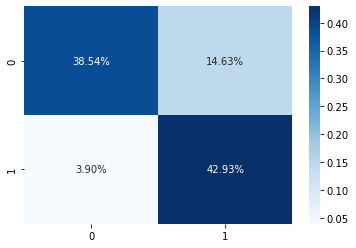

Accuracy is:  81.46341463414633


In [ ]:
cm=confusion_matrix(Y_test,Y_predict)
sns.heatmap(cm/np.sum(cm),annot=True, fmt=".2%",cmap='Blues')
plt.show()
ac=accuracy_score(Y_test,Y_predict)
print('Accuracy is: ',ac*100)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_predict)

0.8146341463414634

In [ ]:
from sklearn.metrics import recall_score
recall_score(Y_test,Y_predict)

0.9166666666666666

In [ ]:
from sklearn.metrics import precision_score
precision_score(Y_test,Y_predict)

0.7457627118644068